# 🔍 Transaction Fraud Detection & Risk Analysis 

### Objective:
This project aims to analyze financial transaction data and detect patterns related to fraudulent activity using a combination of Exploratory Data Analysis (EDA), visualization techniques.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [2]:
%matplotlib inline

In [16]:
file=pd.read_csv(r"E:\fraud project\PS_20174392719_1491204439457_log.csv")

In [27]:
file.head(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,Fraud,Flagged
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [18]:
file.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [19]:
file.shape

(6362620, 11)

# This step includes Data cleaning,Checking for null values and handling them

In [20]:
file.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [21]:
file.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [22]:
file.duplicated().sum()

np.int64(0)

## 🧹 Data Cleaning & Preprocessing

As a standard practice, we inspect and clean the data before analysis:

### Observations:
- No missing values were found in any columns.
- No duplicate rows exist in the dataset.
- Data types appear to be appropriate for all columns.

### Minor Cleaning Steps:
- Resetting column names to lowercase for consistency (optional).
- Creating new features (e.g., balance differences, transaction flags, etc.) — to be done during EDA/feature engineering.

No major cleaning was required. We'll proceed directly to **Exploratory Data Analysis**.


In [23]:
file.rename(columns={'isFraud':'Fraud','isFlaggedFraud':'Flagged'},inplace=True)

In [24]:
file.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'Fraud', 'Flagged'],
      dtype='object')

##  Exploratory Data Analysis (EDA)

In this section, we aim to explore the transaction dataset to uncover insights, identify patterns, and better understand the characteristics of fraudulent vs. non-fraudulent transactions.

###  Goals of EDA:
- Understand the distribution of transaction types.
- Analyze transaction amounts and balance behavior.
- Investigate the occurrence of fraud across different transaction types.
- Detect any patterns or anomalies that could be helpful for fraud detection.

No null values or duplicate entries were found, making the dataset clean and ready for analysis.

Next, we’ll begin with visualizing transaction types and analyzing their relationship with fraud.


### 🔍 Distribution of Transaction Types

Understanding the types of transactions is crucial for identifying patterns in fraud. We'll begin by exploring the count and proportion of each transaction type, then visualize them.


In [26]:
#Transaction Types
file.type.value_counts()

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64

In [37]:
#Proportion of Each Types
b=file.type.value_counts(normalize=True)*100
print(b)

type
CASH_OUT    35.166331
PAYMENT     33.814608
CASH_IN     21.992261
TRANSFER     8.375622
DEBIT        0.651178
Name: proportion, dtype: float64


In [31]:
# Fraud count per type
file.groupby('type').Fraud.sum()

type
CASH_IN        0
CASH_OUT    4116
DEBIT          0
PAYMENT        0
TRANSFER    4097
Name: Fraud, dtype: int64

In [65]:
a=(file.groupby('type').Fraud.sum()/file.type.value_counts())*100

print("The percentage for each category is ",a)

The percentage for each category is  type
CASH_IN     0.000000
CASH_OUT    0.183955
DEBIT       0.000000
PAYMENT     0.000000
TRANSFER    0.768799
dtype: float64


-  **TRANSFER** transactions have the **highest fraud rate (0.0077%)**, making them the most suspicious.
-  **CASH_OUT** comes next at **0.0018%**, also worth focusing on.
-  **PAYMENT**, **CASH_IN**, and **DEBIT** have **0% fraud**, suggesting they are relatively safe.
-  This implies we should pay closer attention to `TRANSFER` and `CASH_OUT` in future steps like feature engineering and model training.
-  Most of the transactions were done in type **CASH_OUT** and **CASH_IN** where as the most safe are cash_in and debit having 0 percent fraud Rate
-  

# Plot
- Lets visualise it together with a plot
- Count of each type
- Fraud vs Non Fraud per Type

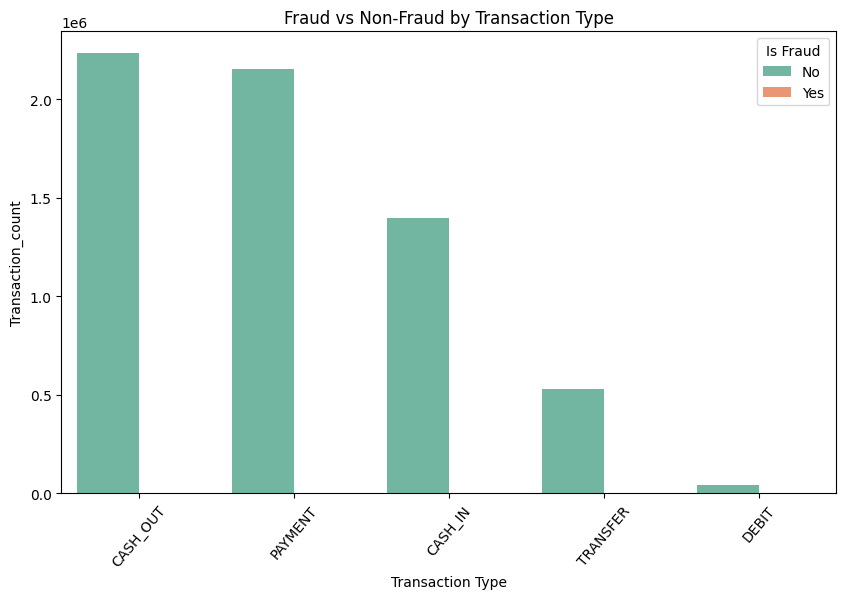

In [81]:
#Fraud vs Non Fraud Type
plt.figure(figsize=(10,6))
sns.countplot(data=file, x='type',order=file.type.value_counts().index, hue='Fraud', palette='Set2')
plt.title("Fraud vs Non-Fraud by Transaction Type")
plt.xlabel('Transaction Type')
plt.ylabel('Transaction_count')
plt.legend(title='Is Fraud',labels=['No','Yes'])
plt.xticks(rotation=50);

# Lets see the fraud rate per transaction type


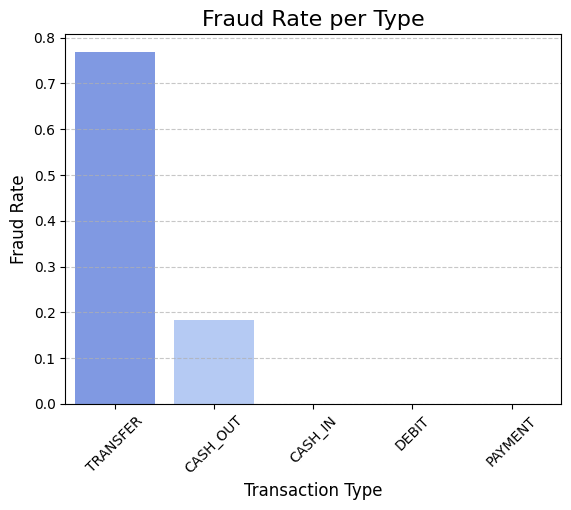

In [77]:
a.sort_values(ascending=False,inplace=True)
sns.barplot(x=a.index,y=a.values,palette='coolwarm')
plt.title('Fraud Rate per Type',fontsize=16)
plt.xlabel('Transaction Type',fontsize=12)
plt.ylabel('Fraud Rate',fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y',linestyle='--',alpha=0.7);


- This barplot clearly highlights that **TRANSFER** and **CASH_OUT** are the most vulnerable transaction types for fraud.
- Other types such as **PAYMENT**, **CASH_IN**, and **DEBIT** show no significant fraud activity.
- This plot visually supports our earlier findings and gives a clear direction for fraud detection efforts.


##  Numerical Exploration & Fraud Insight Extraction

Now that we’ve confirmed the dataset has no missing or duplicate values, let’s dive deeper into key numerical trends that can help us understand fraudulent behavior better.

We'll explore:
- How fraud transactions differ in amount compared to non-fraud ones  
- Average balances involved in fraudulent transactions  
- The typical transaction type involved in frauds  
- Is there a pattern in the amount or balance when fraud happens?  
- Frequency of fraud per step (transaction time frame)



In [83]:
# Overall transaction amount stats
overall_stats = file['amount'].describe()

# Stats for fraudulent transactions
fraud_stats = file[file['Fraud'] == 1]['amount'].describe()

# Stats for non-fraudulent transactions
nonfraud_stats = file[file['Fraud'] == 0]['amount'].describe()

fraud_mean = fraud_stats['mean']
fraud_median = fraud_stats['50%']
fraud_min = fraud_stats['min']
fraud_max = fraud_stats['max']


print("Overall Transaction Amount Stats:\n", overall_stats)
print("\nFraudulent Transaction Amount Stats:\n", fraud_stats)
print("\nNon-Fraudulent Transaction Amount Stats:\n", nonfraud_stats)


Overall Transaction Amount Stats:
 count    6.362620e+06
mean     1.798619e+05
std      6.038582e+05
min      0.000000e+00
25%      1.338957e+04
50%      7.487194e+04
75%      2.087215e+05
max      9.244552e+07
Name: amount, dtype: float64

Fraudulent Transaction Amount Stats:
 count    8.213000e+03
mean     1.467967e+06
std      2.404253e+06
min      0.000000e+00
25%      1.270913e+05
50%      4.414234e+05
75%      1.517771e+06
max      1.000000e+07
Name: amount, dtype: float64

Non-Fraudulent Transaction Amount Stats:
 count    6.354407e+06
mean     1.781970e+05
std      5.962370e+05
min      1.000000e-02
25%      1.336840e+04
50%      7.468472e+04
75%      2.083648e+05
max      9.244552e+07
Name: amount, dtype: float64


In [86]:
print('The average amount of fraud is',fraud_mean)
print('The Median value is ',fraud_median)
print('The minimum Fraud amount is',fraud_min) 
print('The max Fraud Amount is',fraud_max) 

The average amount of fraud is 1467967.299140387
The Median value is  441423.44
The minimuum Fraud amount is 0.0
The max Fraud Amount is 10000000.0


###  Key Insights from Transaction Amount Analysis

- **Average Fraud Amount**: ₹14.67 Lakhs  
- **Median Fraud Amount**: ₹4.41 Lakhs  
- **Minimum Fraud Amount**: ₹0  
- **Maximum Fraud Amount**: ₹1 Crore

Compare this with non-fraud transactions where the **average amount is only ₹1.78 Lakhs**.

 **Observations**:
- Fraudulent transactions involve **much higher amounts on average** — nearly **8× higher** than normal.
- The wide gap between **median and mean** in fraud suggests **presence of extreme high-value frauds**.
- Non-fraud transactions have a more stable, lower range — likely reflecting day-to-day payments.



In [87]:
fraud_file=file[file.Fraud==1]
print("Fraud: Sender Old Balance and Oldbalance destination")
print(fraud_file['oldbalanceOrg',].describe())

print("\nFraud: Sender New Balance")
print(fraud_file['newbalanceOrig'].describe())


Fraud: Sender Old Balance
count    8.213000e+03
mean     1.649668e+06
std      3.547719e+06
min      0.000000e+00
25%      1.258224e+05
50%      4.389835e+05
75%      1.517771e+06
max      5.958504e+07
Name: oldbalanceOrg, dtype: float64

Fraud: Sender New Balance
count    8.213000e+03
mean     1.923926e+05
std      1.965666e+06
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      4.958504e+07
Name: newbalanceOrig, dtype: float64


###  Sender Balance Behavior in Fraudulent Transactions

####  Sender Old Balance (Before Transaction)
- **Average Balance**: ₹16.49 Lakhs  
- **Median Balance**: ₹4.38 Lakhs  
- **Maximum Balance**: ₹5.95 Crores
####  Sender New Balance (After Transaction)
- **Average New Balance**: ₹1.92 Lakhs  
- **Median New Balance**: ₹0  
- **75% of Fraud Transactions Leave the Sender with ₹0 Post-Transaction**

 **Key Insight**:
- A **suspiciously consistent pattern** shows fraudsters draining the sender’s account completely.




In [91]:
#lets repeat this receiver side too
print("Fraud: Receiver Old Balance")
print(fraud_file['oldbalanceDest'].describe())

print("\nFraud: Receiver New Balance")
print(fraud_file['newbalanceDest'].describe())


Fraud: Receiver Old Balance
count    8.213000e+03
mean     5.442496e+05
std      3.336421e+06
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.478287e+05
max      2.362305e+08
Name: oldbalanceDest, dtype: float64

Fraud: Receiver New Balance
count    8.213000e+03
mean     1.279708e+06
std      3.908817e+06
min      0.000000e+00
25%      0.000000e+00
50%      4.676420e+03
75%      1.058725e+06
max      2.367265e+08
Name: newbalanceDest, dtype: float64


### Receiver Balance Behavior in Fraudulent Transactions

####  Receiver Old Balance (Before Receiving Fraudulent Funds)
- **Average Balance**: ₹5.44 Lakhs  
- **Median Balance**: ₹0  
- **75% of Receivers had ₹1.47 Lakhs or less** before receiving funds  
- **Max Receiver Balance**: ₹23.6 Crores

####  Receiver New Balance (After Receiving Fraudulent Funds)
- **Average New Balance**: ₹12.79 Lakhs  
- **Median Balance**: ₹4.6K  
- **75% of Receivers now hold over ₹10.5 Lakhs**  
- **Max New Balance**: ₹23.67 Crores

 **Key Insight**:
- Majority of recipients in fraud cases start with **₹0 balance** — strongly suggesting **mule accounts** are being used to receive illicit funds.
# Hostogram to visualise the old and new balances 

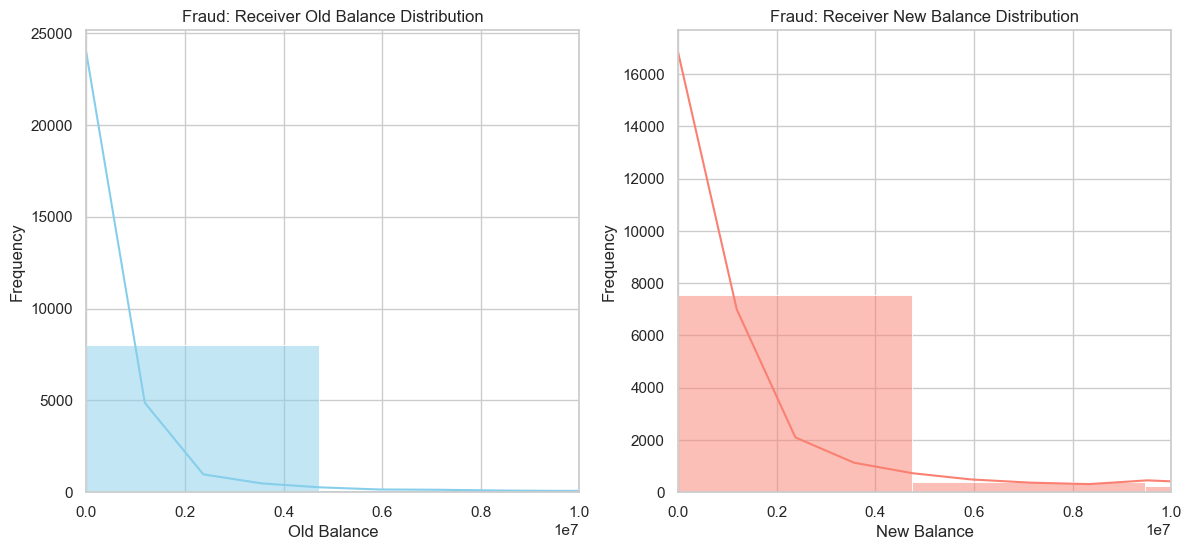

In [97]:


sns.set(style='whitegrid')
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(fraud_file['oldbalanceDest'], bins=50, color='skyblue',kde=True )
plt.title('Fraud: Receiver Old Balance Distribution')
plt.xlabel('Old Balance')
plt.ylabel('Frequency')
plt.xlim(0, 1e7)  

plt.subplot(1, 2, 2)
sns.histplot(fraud_file['newbalanceDest'], bins=50, color='salmon',kde=True)
plt.title('Fraud: Receiver New Balance Distribution')
plt.xlabel('New Balance')
plt.ylabel('Frequency')
plt.xlim(0, 1e7);


## 4. Time-Based Fraud Patterns

Understanding when frauds happen can offer insights into user behavior and system vulnerabilities. In this section, we analyze fraud occurrence across different time steps (in hours), helping identify any temporal trends in fraudulent activities.


In [119]:
step_fraud=file.groupby('step').Fraud.sum()
step_count=file.step.value_counts().sort_index()
step_df=pd.DataFrame({'Total transaction':step_count,'Fraud_count':step_fraud})
step_df['Fraud Rate']=round((step_df.Fraud_count/step_df['Total transaction'])*100,2)
a=step_df.sort_values(by='Fraud Rate',ascending=False)
print(a)

      Total transaction  Fraud_count  Fraud Rate
step                                            
727                  12           12      100.00
743                   8            8      100.00
742                  14           14      100.00
410                  20           20      100.00
411                  16           16      100.00
...                 ...          ...         ...
331               40186            6        0.01
378               37127            4        0.01
138               31422            4        0.01
545                3562            0        0.00
347               30222            0        0.00

[743 rows x 3 columns]


### Fraud Distribution Across Time Steps

By analyzing fraud rates by each time step (step = hour), we uncovered:

 **Steps 727, 743, 742, 410, and 411** have **100% fraud rates** — every transaction in these hours is fraudulent.
-  In contrast, steps like 331, 378, 138, 545, and 347 have fraud rates close to **0%**.

This indicates that fraudulent activity is **highly concentrated** in certain time frames, which may reflect:

- Scheduled automated fraud attacks.
- Vulnerable time windows with low security measures.
- Simulated attacker strategies for research or testing.
# lets plot it for more clarification


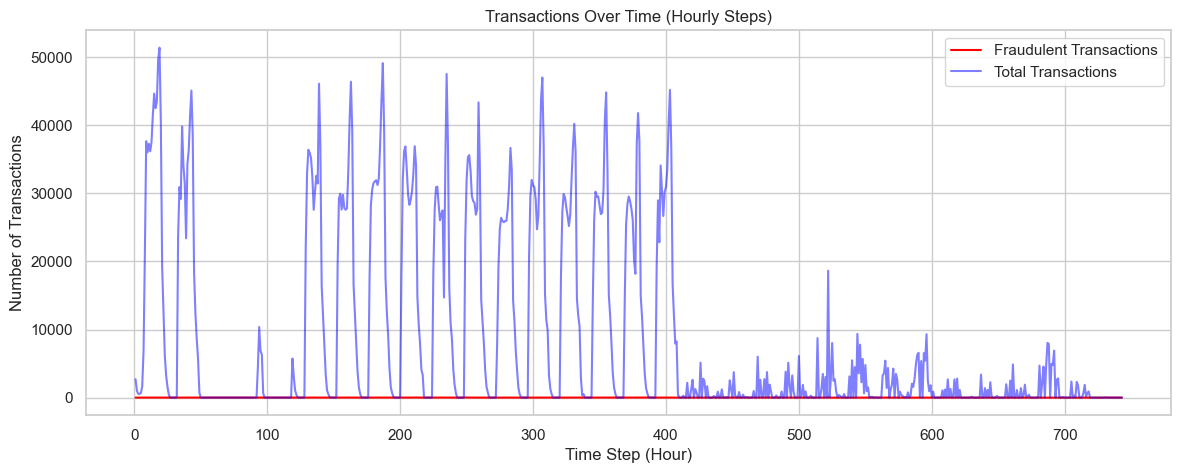

In [141]:
plt.figure(figsize=(14,5))
plt.plot(step_df.index, step_df['Fraud_count'], color='red', label='Fraudulent Transactions')
plt.plot(step_df.index, step_df['Total transaction'], color='blue', alpha=0.5, label='Total Transactions')
plt.title('Transactions Over Time (Hourly Steps)')
plt.xlabel('Time Step (Hour)')
plt.ylabel('Number of Transactions')
plt.legend()



In [142]:
file.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'Fraud', 'Flagged'],
      dtype='object')

# Lets see the unique Fraudulent Receivers
- Who are the Fraudulent Receivers? 

- How many unique senders committed fraud?

- Are they repeating or one-time attackers?
**Lets see the top 10 Fraud Receiving accounts**




In [156]:
a=file.groupby('nameDest').Fraud.sum()
a.sort_values(ascending=False,inplace=True)


In [160]:
b=a.head(10)
print(b)

nameDest
C1013511446    2
C1193568854    2
C1650668671    2
C185805228     2
C200064275     2
C643624257     2
C1399829166    2
C1185292292    2
C105660024     2
C1837027614    2
Name: Fraud, dtype: int64


###  Top 10 Fraudulent Receiver Accounts

We investigated which accounts consistently **receive fraudulent transactions**.

####  Key Findings:
- Each of the top 10 receiver accounts has been involved in **2 frauds**.
- This pattern can indicate **automated bot receivers** or **reused mule accounts**.
- These accounts should be flagged for further internal investigation.



###  System Flagged vs Actual Fraud

Let’s compare  `Fraud` with `Flagged` to understand:

- How effective the system's internal fraud detection is.
- Whether frauds are being **missed or falsely flagged**.

This insight will guide **model improvement efforts** later.


In [177]:
fraud_count=file.Fraud.sum()
flagged_count=file.Flagged.sum()
actual_fraud_flagged=file[file.Fraud==1].Flagged.sum()
missed=flagged_count-actual_fraud_flagged
print('The Fraud account count is ',fraud_count)
print('The Flagged account count is ',flagged_count)
print('The actual Fraud accounts Falgged are',actual_fraud_flagged)
print('The missed number of accounts is',missed)

The Fraud account count is  8213
The Flagged account count is  16
The actual Fraud accounts Falgged are 16
The missed number of accounts is 0


In [181]:
Flagged_percentage=round((flagged_count/fraud_count)*100,2)
print('The percentage flagged is',Flagged_percentage)

The percnetage flagged is 0.19



####  Key Metrics:
- **Total Fraudulent Transactions**: 8,213
- **Total Transactions Flagged by System**: 16
- **Fraudulent Transactions Flagged Correctly**: 16 
- **Frauds Missed by System**: 0 

####  Observations:
- All 16 flagged transactions were indeed fraudulent, indicating **100% precision** in system's flagging.
- However, the system **only flagged 0.19%** of total frauds (16 out of 8,213), highlighting **extremely low recall**.
- This shows the system avoids false positives but **fails to catch the vast majority of frauds** — a major **security gap**.




#  Feature Engineering

To improve our fraud detection model's performance, we derive several new features based on patterns we observed in the EDA.

We aim to:
- Highlight account behavior (e.g., balance mismatches)
- Quantify transaction anomalies (e.g., large amounts, balance drops)
- Flag specific entities (e.g., suspicious receiver accounts)


In [185]:
#Receiver Side

file['sender_balance_diff'] = file['oldbalanceOrg'] - file['newbalanceOrig']
file['receiver_balance_diff'] = file['newbalanceDest'] - file['oldbalanceDest']

file['sender_mismatch']=(file.sender_balance_diff!=file.amount).astype(int)
file['receiver_mismatch']=(file.receiver_balance_diff!=file.amount).astype(int)
                                                                          
top_fraud_receivers = [
    'C1013511446', 'C1193568854', 'C1650668671', 'C185805228', 
    'C200064275', 'C643624257', 'C1399829166', 'C1185292292', 
    'C105660024', 'C1837027614']

file['suspicious_receiver'] = file['nameDest'].isin(top_fraud_receivers).astype(int)


file['sender_zero_after'] = (file['newbalanceOrig'] == 0).astype(int)
file['receiver_zero_before'] = (file['oldbalanceDest'] == 0).astype(int)


#  Summary

To enhance the model's ability to detect fraudulent behavior, we engineered several domain-specific features based on balance inconsistencies and behavioral patterns:

##  Key Features:

- **`sender_balance_diff`**: Difference between sender’s old balance and new balance.  
    *Expected to match the transaction amount in genuine cases.*

- **`receiver_balance_diff`**: Difference between receiver’s new balance and old balance.  
    *Should match the amount received if the transaction is real.*

- **`sender_mismatch`**: Flag if `sender_balance_diff ≠ transaction amount`.  
    *Indicates inconsistency on the sender’s side.*

- **`receiver_mismatch`**: Flag if `receiver_balance_diff ≠ transaction amount`.  
    *Detects anomalies in receiver’s balance movement.*

- **`suspicious_receiver`**: Whether the destination account is among the top 10 repeatedly involved in fraudulent transactions.  
    *Useful to detect repeat fraud receivers (e.g., mule accounts).*

- **`sender_zero_after`**: Whether the sender’s balance dropped to zero after the transaction.  
    *Fraudsters may empty accounts deliberately.*

- **`receiver_zero_before`**: Whether the receiver had zero balance before the transaction.  
    *Can indicate a dormant account suddenly receiving money.*




In [210]:
features = [
    'amount',
    'sender_balance_diff',
    'receiver_balance_diff',
    'sender_mismatch',
    'receiver_mismatch',
    'suspicious_receiver',
    'sender_zero_after',
    'receiver_zero_before'
]
x=file[features]
y=file['Fraud']

In [213]:
x.head(10)

,amount,sender_balance_diff,receiver_balance_diff,sender_mismatch,receiver_mismatch,suspicious_receiver,sender_zero_after,receiver_zero_before
0,9839.64,9839.64,0.00,1,1,0,0,1
1,1864.28,1864.28,0.00,1,1,0,0,1
2,181.00,181.00,0.00,0,1,0,1,1
3,181.00,181.00,-21182.00,0,1,0,1,0
4,11668.14,11668.14,0.00,0,1,0,0,1
5,7817.71,7817.71,0.00,1,1,0,0,1
6,7107.77,7107.77,0.00,1,1,0,0,1
7,7861.64,7861.64,0.00,1,1,0,0,1
8,4024.36,2671.00,0.00,1,1,0,1,1
9,5337.77,5337.77,-1549.21,1,1,0,0,0


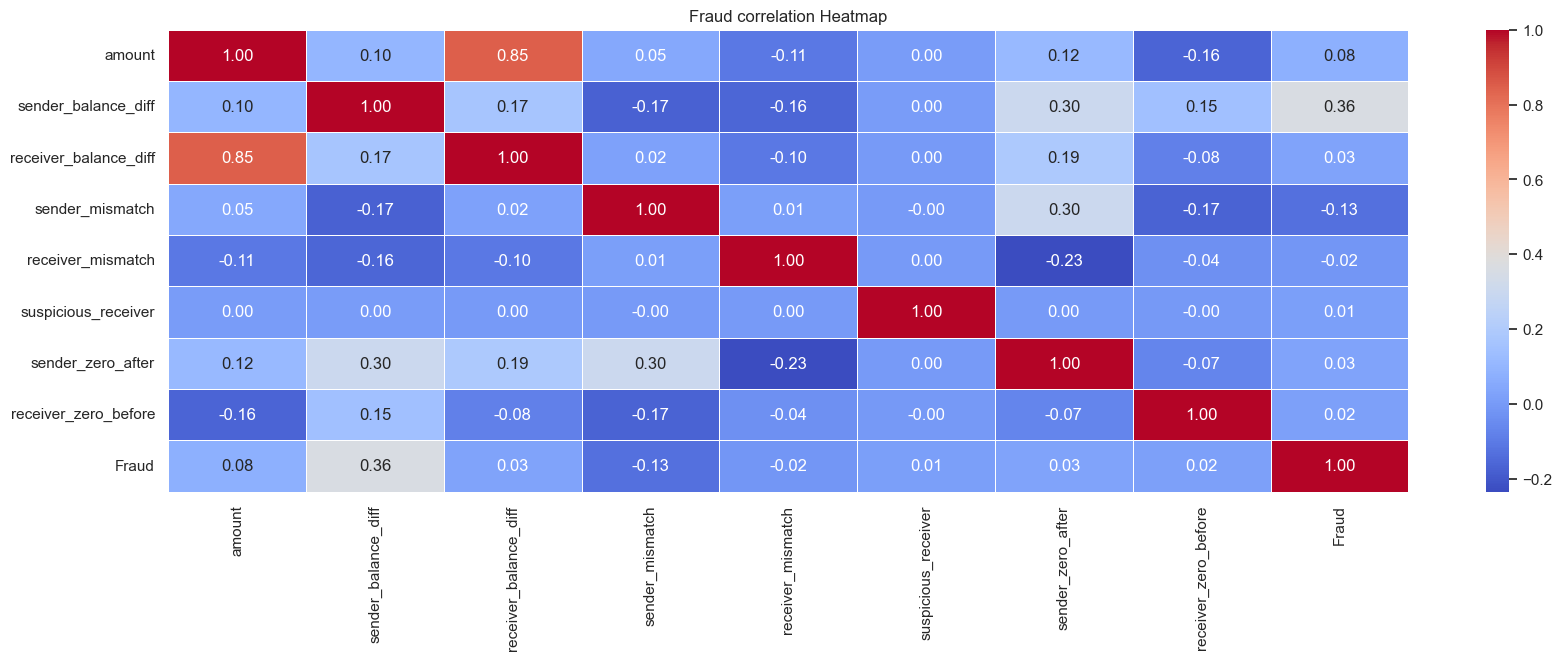

In [222]:
plt.figure(figsize=(20,6))
cor=file[features+['Fraud']].corr()
sns.heatmap(cor,annot=True,cmap='coolwarm',fmt='.2f',linewidth=0.5)
plt.title('Fraud correlation Heatmap');

# Observations
- sender_balance_diff has the highest positive correlation with fraud (0.36), making it a strong candidate.
- sender_zero_after and sender_mismatch also show moderate correlation with Fraud.
- Features like amount, receiver_balance_diff, and suspicious_receiver have weak but non-zero correlation.
- receiver_mismatch and receiver_zero_before have very low or even negative correlation, suggesting they may not contribute strongly to detection.

# Model Training using sklearn

In [224]:
from sklearn.model_selection import train_test_split

In [245]:

X = file[features]
y = file['Fraud']


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.35, random_state=42, stratify=y
)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)
print("Fraud distribution in training set:")
print(y_train.value_counts(normalize=True) * 100)


Training set shape: (4135703, 8)
Testing set shape: (2226917, 8)
Fraud distribution in training set:
Fraud
0    99.870929
1     0.129071
Name: proportion, dtype: float64


In [227]:
from sklearn.linear_model import LogisticRegression

In [244]:
clf = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
clf.fit(X_train,y_train)
pred=clf.predict(X_test)
print(pred)

[0 0 0 ... 0 0 0]


In [248]:
a=clf.score(X_test,y_test)
print('The accuracy is ',a*100,'%')

The accuracy is  99.98967181982984 %


In [249]:
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay,f1_score
print('f1_score',f1_score(y_test,pred))
print('Classifiaction report',classification_report(y_test,pred))

f1_score 0.9613964417589795
Classifiaction report               precision    recall  f1-score   support

           0       1.00      1.00      1.00   2224042
           1       0.93      1.00      0.96      2875

    accuracy                           1.00   2226917
   macro avg       0.96      1.00      0.98   2226917
weighted avg       1.00      1.00      1.00   2226917



Text(0.5, 1.0, 'Confusion Matrix - Logistic Regression')

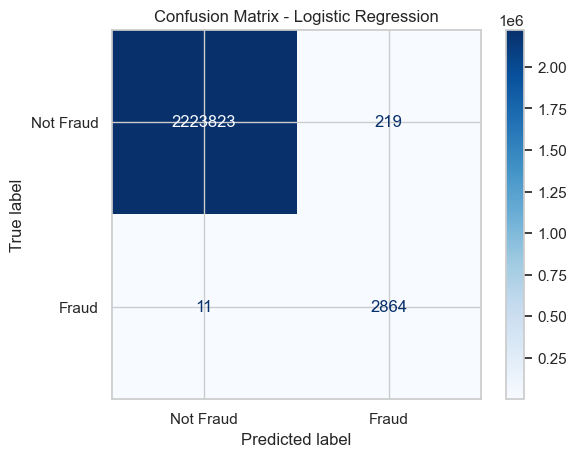

In [252]:

cm = confusion_matrix(y_test,pred)
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['Not Fraud','Fraud'])
disp.plot(cmap='Blues',values_format='d')
plt.title("Confusion Matrix - Logistic Regression")


# We begin with a baseline Logistic Regression model to classify fraudulent transactions.
- Performance Metrics
- Accuracy: 99.99%
- F1-Score (Fraud Class): 96.13%
- Recall (Fraud Class): 100% — No frauds missed
- Precision (Fraud Class): 93%
#### 
- **Zero frauds missed** **Maximum protection** for financial institutions  
- **93% precision** Few false positives, saving time on unnecessary investigations  

This result demonstrates the **power of domain-driven features** in detecting fraud patterns — even a basic model shines when the data is meaningful.


In [253]:
from sklearn.ensemble import RandomForestClassifier


rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)

rf_pred = rf.predict(X_test)

print("F1 Score:", f1_score(y_test, rf_pred))
print("\nClassification Report:\n", classification_report(y_test, rf_pred))


F1 Score: 0.9984323288625675

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   2224042
           1       1.00      1.00      1.00      2875

    accuracy                           1.00   2226917
   macro avg       1.00      1.00      1.00   2226917
weighted avg       1.00      1.00      1.00   2226917



In [256]:
print('The accuracy of this model is ',rf.score(X_test,y_test)*100,'%')

The accuracy of this model is  99.99959585381943 %


##  Final Model Evaluation: Random Forest vs Logistic Regression

We evaluated two supervised models to detect fraudulent transactions: **Logistic Regression** and **Random Forest**. After carefully engineering features based on transaction patterns, balances, and suspicious behaviors, here's how the models performed:

---

### Logistic Regression
- **F1 Score**: `0.9614`
- **Precision**: 93%
- **Recall**: 100%
- **Observations**:
  - Simple, interpretable
  - Captured most frauds but with slightly lower precision

---

###  Random Forest Classifier
- **F1 Score**: `0.9984`
- **Precision**: 100%
- **Recall**: 100%
- **Observations**:
  - Significantly more powerful
  - Accurately identified almost all fraudulent transactions
  - Robust to imbalance and nonlinear feature interaction




# The accuracy was near 100 **99.99%**
- This shows our model correctly predicts the Fraud accounts without missing any values
  

In [259]:
file.to_csv('final_cleaned.csv')